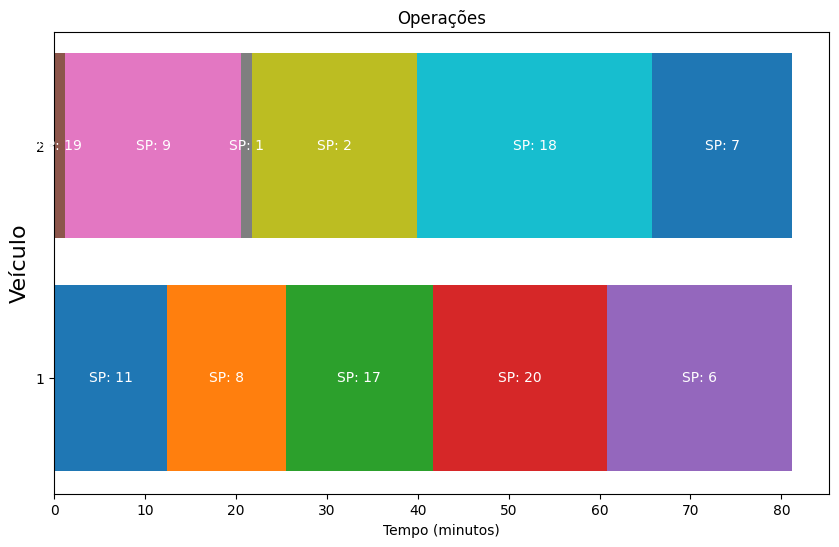

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

quality_metrics = ["Fe", "SiO2", "Al2O3", "P", "+31.5", "-6.3"]
quality_metrics_formatted = ["Fe", "SiO_{2}", "Al_{2}O_{3}", "P", "+31.5", "-6.3"]
quality_metrics_dict = dict(zip(quality_metrics, quality_metrics_formatted))

# Load the data from the "Operations" sheet
operations_df = pd.read_excel("../out_interactive.xlsm", sheet_name="Resultados").iloc[
    :-1
]

_quality_metrics = []
_quality_metrics_formatted = []
for metric in operations_df.columns.intersection(quality_metrics).to_list():
    _quality_metrics_formatted.append(quality_metrics_dict[metric])
    _quality_metrics.append(metric)

operations_df["Início"] = pd.to_timedelta(operations_df["Início"], unit="m")
operations_df["Fim"] = pd.to_timedelta(operations_df["Fim"], unit="m")
operations_df["Tempo Deslocamento (min)"] = (
    pd.to_timedelta(operations_df["Tempo Deslocamento"], unit="m").dt.total_seconds()
    / 60
)

# Convert the timedeltas to a more plot-friendly format by using hours as float
operations_df["Início (min)"] = operations_df["Início"].dt.total_seconds() / 60
operations_df["Fim (min)"] = operations_df["Fim"].dt.total_seconds() / 60
operations_df["Início (min)"] -= operations_df["Tempo Deslocamento (min)"]

# Create the Gantt plot with additional annotations
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each operation and add text annotations
for idx, row in operations_df.iterrows():
    ax.barh(
        row["Veículo"],
        row["Fim (min)"] - row["Início (min)"],
        left=row["Início (min)"],
    )
    # Calculate the position for the text
    mid_point = (row["Início (min)"] + row["Fim (min)"]) / 2
    label = f'SP: {row["Pilha"]}'
    ax.text(
        mid_point,
        row["Veículo"],
        label,
        ha="center",
        va="center",
        color="white",
        fontsize=10,
        mouseover=True,
        usetex=False,
    )

# Formatting the plot
ax.set_yticks([1, 2])
ax.set_ylim(0.5, None)
ax.set_xlabel("Tempo (minutos)")
ax.set_ylabel("Veículo", fontsize=16)
ax.set_title("Operações")

plt.show()

In [ ]:
def generate_gantt_chart(operations_df, sheet):
    quality_metrics = ["Fe", "SiO2", "Al2O3", "P", "+31.5", "-6.3"]
    quality_metrics_formatted = ["Fe", "SiO_{2}", "Al_{2}O_{3}", "P", "+31.5", "-6.3"]
    quality_metrics_dict = dict(zip(quality_metrics, quality_metrics_formatted))
    
    _quality_metrics = []
    _quality_metrics_formatted = []
    for metric in operations_df.columns.intersection(quality_metrics).to_list():
        _quality_metrics_formatted.append(quality_metrics_dict[metric])
        _quality_metrics.append(metric)
    
    operations_df["Início"] = pd.to_timedelta(operations_df["Início"], unit="m")
    operations_df["Fim"] = pd.to_timedelta(operations_df["Fim"], unit="m")
    operations_df["Tempo Deslocamento (min)"] = (
        pd.to_timedelta(operations_df["Tempo Deslocamento"], unit="m").dt.total_seconds()
        / 60
    )
    
    # Convert the timedeltas to a more plot-friendly format by using hours as float
    operations_df["Início (min)"] = operations_df["Início"].dt.total_seconds() / 60
    operations_df["Fim (min)"] = operations_df["Fim"].dt.total_seconds() / 60
    operations_df["Início (min)"] -= operations_df["Tempo Deslocamento (min)"]
    
    # Create the Gantt plot with additional annotations
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot each operation and add text annotations
    for idx, row in operations_df.iterrows():
        ax.barh(
            row["Veículo"],
            row["Fim (min)"] - row["Início (min)"],
            left=row["Início (min)"],
        )
        # Calculate the position for the text
        mid_point = (row["Início (min)"] + row["Fim (min)"]) / 2
        label = f'SP: {row["Pilha"]}'
        ax.text(
            mid_point,
            row["Veículo"],
            label,
            ha="center",
            va="center",
            color="white",
            fontsize=10,
            mouseover=True,
            usetex=False,
        )
    
    # Formatting the plot
    ax.set_yticks([1, 2])
    ax.set_ylim(0.5, None)
    ax.set_xlabel("Tempo (minutos)")
    ax.set_ylabel("Veículo", fontsize=16)
    ax.set_title("Operações")

    sheet.pictures.add(fig, name='Gantt', update=True)